In [6]:
from google.colab import drive

In [7]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
import numpy as np
import pandas as pd
import cv2
import os

In [8]:
drive.mount('/content/drive')#connect drive to colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
Datadir='/content/drive/MyDrive/Mini_Project_V'
category=["PNEUMONIA","NORMAL"]
dataset=[]
size=150
ct=0
ct1=0
for types in category:
    path=os.path.join(Datadir,types)
    ex=0
    for img in os.listdir(path):
        if types=='PNEUMONIA':
            ex=1
            ct=ct+1;
        else :
            ct1=ct1+1;
            ex=0
        try :
            img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img=cv2.resize(img_arr ,(size,size),interpolation=cv2.INTER_AREA)
            dataset.append([new_img,ex])
        except Exception as e:
            pass

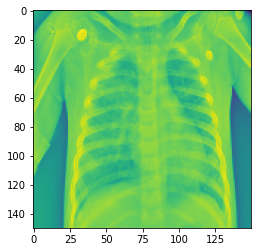

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(dataset[0][0])

In [19]:
import random
random.shuffle(dataset)
X=[]
Y=[]
for features,label in dataset:
  X.append(features)
  Y.append(label)

X=np.array(X).reshape(-1,size,size,1)


X=X/225
Y=np.array(Y)

In [20]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=50)

ANN

In [21]:
model=Sequential()
model.add(Flatten(input_shape=(size,size)))
model.add(BatchNormalization(axis=1))
model.add(Dense(408,activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Dense(104,activation='relu'))
model.add(BatchNormalization(axis=1))plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [22]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])#0.01

In [23]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
filepath="/content/drive/MyDrive/saved_models/CatvsDog-{epoch:02d}-{val_accuracy:.2f}.hdf5"

# save the model with the best validation (development) accuracy till now
earlystopping = EarlyStopping(monitor='val_loss',patience=8,verbose=1)


callback_list=[earlystopping]

In [24]:
history=model.fit(X_train,Y_train,epochs=15,validation_split=0.2,callbacks=callback_list)

Epoch 1/15
95/95 [==============================] - 10s 90ms/step - loss: 0.1832 - accuracy: 0.9248 - val_loss: 0.4251 - val_accuracy: 0.7536
Epoch 2/15
95/95 [==============================] - 8s 87ms/step - loss: 0.1176 - accuracy: 0.9594 - val_loss: 0.1716 - val_accuracy: 0.9394
Epoch 3/15
95/95 [==============================] - 8s 86ms/step - loss: 0.1014 - accuracy: 0.9614 - val_loss: 0.1428 - val_accuracy: 0.9473
Epoch 4/15
95/95 [==============================] - 8s 87ms/step - loss: 0.0737 - accuracy: 0.9703 - val_loss: 0.1430 - val_accuracy: 0.9486
Epoch 5/15
95/95 [==============================] - 9s 97ms/step - loss: 0.0543 - accuracy: 0.9802 - val_loss: 0.1341 - val_accuracy: 0.9552
Epoch 6/15
95/95 [==============================] - 8s 86ms/step - loss: 0.0518 - accuracy: 0.9805 - val_loss: 0.1360 - val_accuracy: 0.9605
Epoch 7/15
95/95 [==============================] - 8s 87ms/step - loss: 0.0508 - accuracy: 0.9802 - val_loss: 0.1522 - val_accuracy: 0.9513
Epoch 8/15
9

In [26]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)

30/30 [==============================] - 1s 32ms/step


In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9725738396624473

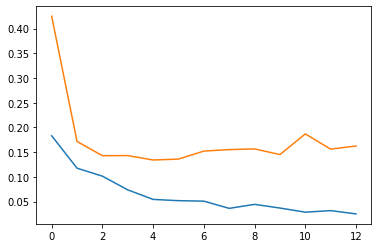

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


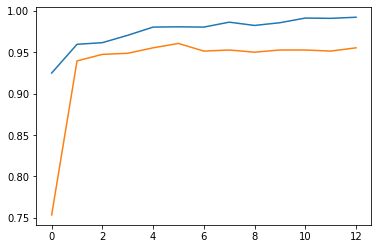

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [32]:
#saving model
model.save_weights("/content/drive/MyDrive/Mini_Project_V/TESTANN.hdf5",overwrite=True)

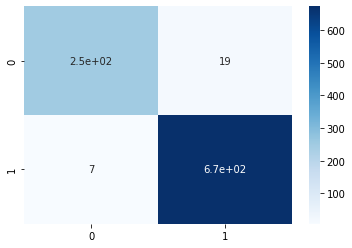

In [33]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns

sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, cmap='Blues')

CNN

In [34]:
model1=Sequential()

model1.add(Conv2D(16,(3,3),activation='relu',input_shape=(size,size,1)))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(32,(3,3),activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Flatten())
model1.add(Dense(16,activation='relu'))
model1.add(BatchNormalization(axis=1))
model1.add(Dense(1,activation='sigmoid'))

In [36]:
Y_train=np.reshape(Y_train,(3791,1))
Y_train.shape

(3791, 1)

In [37]:
model1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [38]:
history2=model1.fit(X_train,Y_train,epochs=15,batch_size=64,validation_split=0.2)

Epoch 1/15
48/48 [==============================] - 57s 1s/step - loss: 0.3376 - accuracy: 0.8823 - val_loss: 0.5721 - val_accuracy: 0.7655
Epoch 2/15
48/48 [==============================] - 59s 1s/step - loss: 0.1934 - accuracy: 0.9575 - val_loss: 0.4563 - val_accuracy: 0.8709
Epoch 3/15
48/48 [==============================] - 54s 1s/step - loss: 0.1361 - accuracy: 0.9759 - val_loss: 0.2774 - val_accuracy: 0.9618
Epoch 4/15
48/48 [==============================] - 54s 1s/step - loss: 0.0968 - accuracy: 0.9832 - val_loss: 0.3023 - val_accuracy: 0.8129
Epoch 5/15
48/48 [==============================] - 53s 1s/step - loss: 0.0784 - accuracy: 0.9878 - val_loss: 0.1845 - val_accuracy: 0.9684
Epoch 6/15
48/48 [==============================] - 53s 1s/step - loss: 0.0571 - accuracy: 0.9937 - val_loss: 0.2092 - val_accuracy: 0.9499
Epoch 7/15
48/48 [==============================] - 53s 1s/step - loss: 0.0517 - accuracy: 0.9960 - val_loss: 0.2108 - val_accuracy: 0.9157
Epoch 8/15
48/48 [==

In [39]:
y_prob=model1.predict(X_test)
y_prob=y_prob>0.5
accuracy_score(Y_test,y_pred)

30/30 [==============================] - 4s 137ms/step


0.9725738396624473

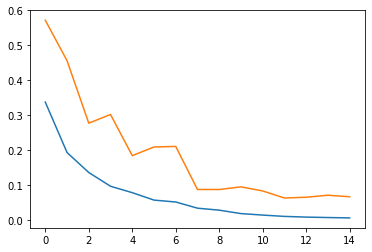

In [40]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

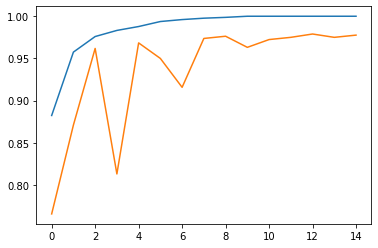

In [41]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

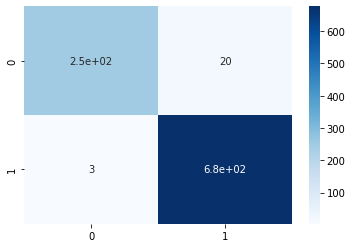

In [42]:
sns.heatmap(confusion_matrix(Y_test, y_prob), annot=True, cmap='Blues')

In [44]:
#saving model
model1.save_weights("/content/drive/MyDrive/Mini_Project_V/TESTCNN.hdf5",overwrite=True)